In [ ]:
#PCA is a Principle Component Analysis -supervised-both input and out put train (x,y)
#Scalar (size) and Vector(size and direction) 
#Eigen Value (Scalar(single)value), Eigen Vector*(1Dimention,2D,3D ) 
#Eiggen higher value is  PCA1 , low in 3d is pca3

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#dataset["outputcolumn"].value_counts() to check imbalanced data

In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')

In [3]:
dataset.columns
#14 columns are u=index 0 to 13

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [4]:

X = dataset.iloc[:, 0:13].values
#all rows (:) and columns from index 0 to 12 (13 not included)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
y = dataset.iloc[:, 13].values
#all rows (:) and only the column at index 13 (a single column)

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling on X (input)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  #learn and predict same passed input X_train(parameter)
X_test = sc.transform(X_test)   #input test set:learned from the training data (fit) are applied to modify the test data.

In [24]:
# Applying PCA
from sklearn.decomposition import KernelPCA
#kpca = KernelPCA(n_components = 2,kernal='rbf')  #2D rbf is non linear
#kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=False)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
#explained_variance = KernelPCA.explained_variance_ratio_  #PCA1,PCA2(clusters) eigen vector created based on Evalues

In [22]:
import sklearn
print(sklearn.__version__)

1.5.2


In [23]:
pip install -U scikit-learn

In [26]:
print(dir(kpca))

['X_fit_', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_centerer', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_fit_inverse_transform', '_fit_transform', '_get_default_requests', '_get_doc_link', '_get_kernel', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_n_features_out', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'alpha', 'coef0', 'copy_X', 'degree', 'eigen_solver', 'eigenva

In [30]:
# Access the eigenvalues
eigenvalues = kpca.eigenvalues_
eigenvector = kpca.eigenvectors_

In [31]:
eigenvector

array([[-1.42871722e-02, -2.65543884e-17],
       [-1.42871722e-02,  1.40275318e-15],
       [-1.42871722e-02,  0.00000000e+00],
       [-1.42871722e-02,  4.44089210e-16],
       [-1.42871722e-02,  1.33445823e-17],
       [-1.42871722e-02,  1.22408044e-17],
       [-1.42871722e-02,  1.29288806e-17],
       [-1.42871722e-02,  1.18072624e-17],
       [-1.42871722e-02,  1.23550904e-17],
       [-1.42871722e-02,  1.11947125e-17],
       [-1.42871722e-02,  1.22904380e-17],
       [-1.42871722e-02,  2.28113861e-18],
       [-1.42871722e-02,  2.61219564e-18],
       [-1.42871722e-02,  2.03629831e-18],
       [ 4.92907442e-01,  5.00000000e-01],
       [-1.42871722e-02, -5.17501950e-17],
       [-1.42871722e-02, -5.17501950e-17],
       [-1.42871722e-02, -5.17501950e-17],
       [-1.42871722e-02, -5.17383246e-17],
       [-1.42871722e-02, -5.17442945e-17],
       [-1.42871722e-02, -5.17383246e-17],
       [-1.42871722e-02, -5.17442945e-17],
       [-1.42871722e-02, -5.00041565e-17],
       [-1.

In [28]:
eigenvalues

array([5.83098592, 2.        ])

In [ ]:
#PCA Dimentional Reduction(used all features(i/p)) applied and utilize to any linear model

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train) #supervised both x,y

LogisticRegression(random_state=0)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[ 0, 14,  0],
       [ 0, 16,  0],
       [ 0,  6,  0]], dtype=int64)

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
from sklearn.metrics import classification_report
clf = classification_report(y_test,y_pred)
clf

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        14\n           2       0.44      1.00      0.62        16\n           3       0.00      0.00      0.00         6\n\n    accuracy                           0.44        36\n   macro avg       0.15      0.33      0.21        36\nweighted avg       0.20      0.44      0.27        36\n'

In [39]:
print(clf)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.44      1.00      0.62        16
           3       0.00      0.00      0.00         6

    accuracy                           0.44        36
   macro avg       0.15      0.33      0.21        36
weighted avg       0.20      0.44      0.27        36



In [40]:
#Accuracy is 97 is good score to save best model.

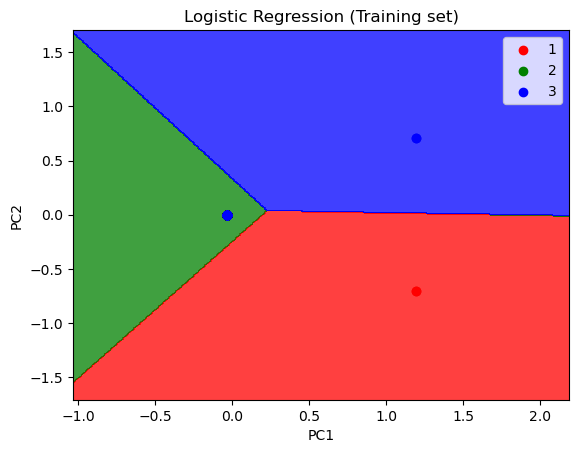

In [41]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

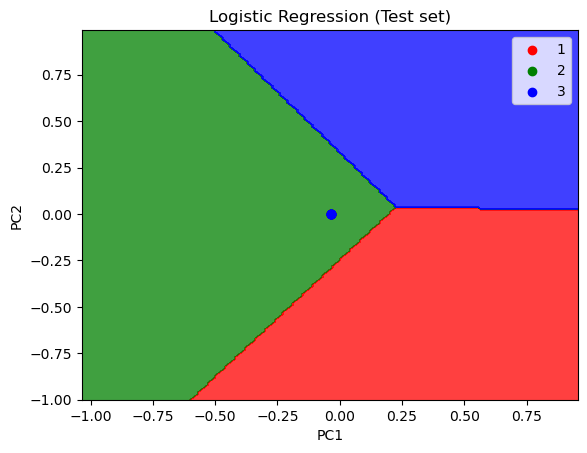

In [42]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()